# Clustering

# Problem Statement: Analyzing the wholesale Customers into distinct groups

The objective of this analysis is to segment wholesale customers into distinct groups based on their purchasing behaviour using clustering techniques. By applying clustering algorithms to the given wholesale customers' data, the aim is to identify patterns and group customers with similar purchasing patterns. This can help in targeted marketing, customer relationship management, and inventory management.
Ye nikla hai 2nd ka problem statement

In [43]:
import pandas as pd

In [44]:
df = pd.read_csv("C://Users//ASUS//Downloads//Wholesale customers data.csv")

# No Cleaning Required

In [45]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [46]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

# Scaling the Continuous Variable Values

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc=StandardScaler()

In [49]:
df['Fresh']=sc.fit_transform(df[['Fresh']])
df['Milk']=sc.fit_transform(df[['Milk']])
df['Grocery']=sc.fit_transform(df[['Grocery']])
df['Frozen']=sc.fit_transform(df[['Frozen']])
df['Detergents_Paper']=sc.fit_transform(df[['Detergents_Paper']])
df['Delicassen']=sc.fit_transform(df[['Delicassen']])

In [50]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Making clusters using Kmeans

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\a

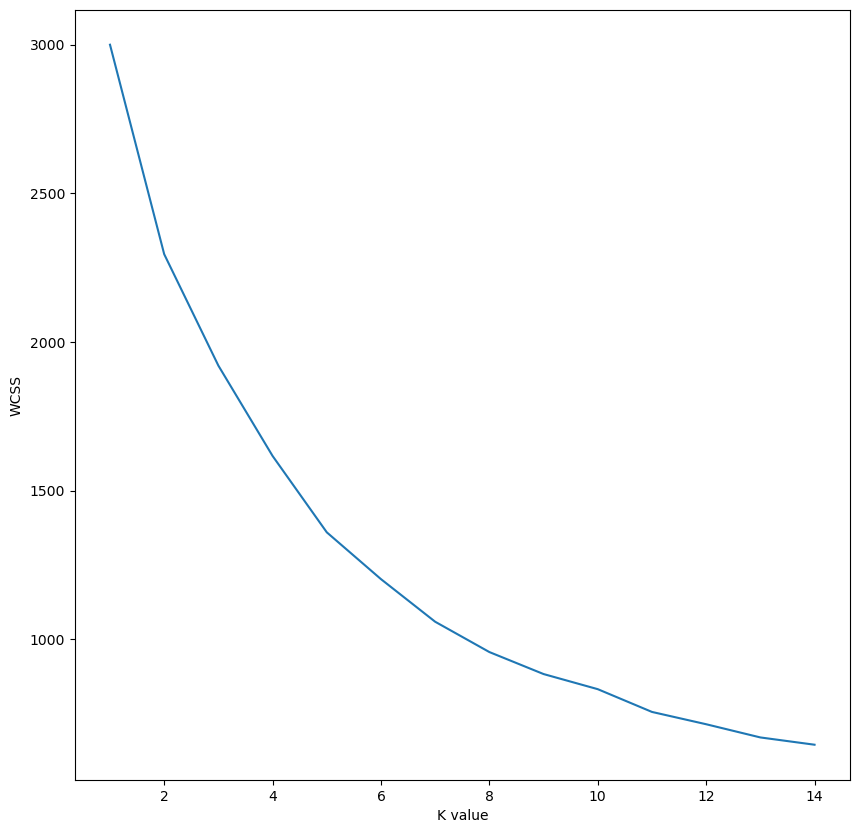

In [51]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(df)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\a

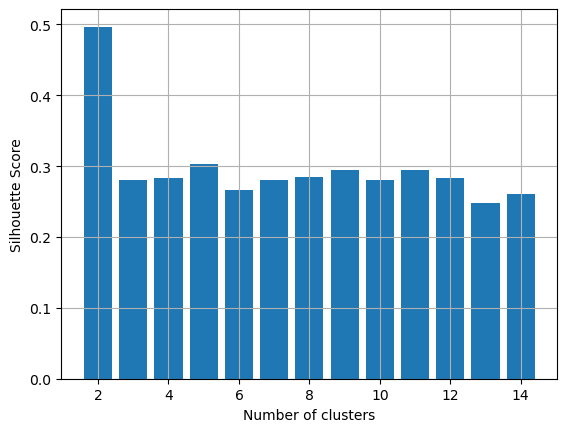

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

In [53]:
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(df)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [54]:
#Labels of each point
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [55]:
#Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
kmeans.inertia_

2293.8707551733805

In [56]:
#Coordinates of cluster centers. 
kmeans.cluster_centers_

array([[ 1.95918367,  2.51020408, -0.10106482,  1.83909682,  2.09174591,
        -0.03300243,  2.05830652,  0.61842019],
       [ 1.24296675,  2.54731458,  0.01266541, -0.23047505, -0.26213696,
         0.00413585, -0.25794634, -0.07750023]])

In [57]:
silhouette_score(df, KMeans(n_clusters = 2).fit_predict(df))

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.502613618171414

In [58]:
df1 = df.copy()

In [59]:
df1["Cluster"] = clusters

In [60]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [61]:
df1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1


In [62]:
df1[df1['Cluster']==0].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0
mean,1.959184,2.510204,-0.101065,1.839097,2.091746,-0.033002,2.058307,0.618420,0.0
std,0.199915,0.767095,1.413102,1.836439,1.534585,1.154786,1.663096,2.519055,0.0
min,1.000000,1.000000,-0.943192,-0.279337,0.591605,-0.626693,-0.554862,-0.540264,0.0
25%,2.000000,2.000000,-0.792475,0.718766,1.249924,-0.455323,1.006945,-0.281824,0.0
50%,2.000000,3.000000,-0.512097,1.199776,1.598731,-0.331384,1.825854,-0.030839,0.0
75%,2.000000,3.000000,-0.061529,2.351705,2.215964,-0.044942,2.511218,0.477521,0.0
max,2.000000,3.000000,7.927738,9.183650,8.936528,6.900600,7.967672,16.478447,0.0


In [63]:
df1[df1['Cluster']==1].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.0
mean,1.242967,2.547315,0.012665,-0.230475,-0.262137,0.004136,-0.257946,-0.077500,1.0
std,0.429425,0.776043,0.938613,0.484685,0.468768,0.981797,0.434497,0.541416,0.0
min,1.000000,1.000000,-0.949683,-0.778795,-0.837334,-0.628343,-0.604416,-0.540264,1.0
25%,1.000000,2.000000,-0.686166,-0.599942,-0.623057,-0.483266,-0.555807,-0.401104,1.0
50%,1.000000,3.000000,-0.248501,-0.352858,-0.434379,-0.316948,-0.474651,-0.222539,1.0
75%,1.000000,3.000000,0.415042,0.029332,0.008557,0.132305,-0.071076,0.079744,1.0
max,2.000000,3.000000,5.084854,2.405150,1.508658,11.919002,1.509209,4.596234,1.0


In [64]:
data = [[1,3,663,209,456,100,186,189]]
new_data = pd.DataFrame(data, columns=['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])

In [65]:
new_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,663,209,456,100,186,189


In [66]:
kmeans.predict(new_data)

array([0])

# Interpretation of clusters (Kmeans)

# Cluster Size:
# Cluster 1: 
49 data points
# Cluster 2: 
391 data points
# Comparison:
Cluster 2 is significantly larger than Cluster 1, containing roughly eight times as many data points. This suggests that Cluster 2 represents a broader segment of the data, while Cluster 1 might capture a more specific or outlier group.
# Central Tendency (Mean):
# Cluster 1:
The means for most features in Cluster 1 are slightly positive or negative, Channel and Region having means close to 2.
# Cluster 2:
The means in Cluster 2 are closer to zero for most features, except for Channel and Region, which have means of 1.24 and 2.55, respectively.
# Comparison:
Cluster 1 has higher mean values for most features, suggesting that the data points in Cluster 1 are, on average, higher in value for these features compared to Cluster 2. Cluster 2’s features are more centered around zero, indicating that this cluster might represent a more “neutral” or typical set of data points.
# Variability (Standard Deviation):
# Cluster 1:
The standard deviations in Cluster 1 are generally higher, especially Fresh and	Milk (1.41 and 1.83, respectively).
# Cluster 2:
The standard deviations in Cluster 2 are lower overall, with the Fresh having a standard deviation of 0.93 and the Milk at 0.48.
# Comparison: 
Cluster 1 has more variability within its features compared to Cluster 2, meaning the data points in Cluster 1 are more spread out. This could indicate that Cluster 1 is more diverse or contains more extreme values, while Cluster 2 is more homogeneous.
# Range (Min, Max, Quartiles):
# Cluster 1:
Has a broader range for some features, such as the Fresh (min: -0.94, max: 7.93) and Delicassen (min: -0.54, max: 16.48).
# Cluster 2:
The range for most features in Cluster 2 is more restricted. For instance, Fresh ranges from -0.95 to 5.08, and Delicassen from -0.54 to 4.59.
# Comparison:
The range of values in Cluster 1 is generally wider, particularly for outliers, suggesting that Cluster 1 includes more extreme cases compared to Cluster 2. Cluster 2’s data is more concentrated around the median values, which is reflected in its lower standard deviations and narrower ranges.
# Outliers and Extreme Values:
  # Cluster 1:
Contains more extreme maximum values, particularly in the Delicassen (max: 16.48) and Frozen (max: 6.90).
  # Cluster 2:
While Cluster 2 also has some outliers (e.g.,Frozen	 with a max of 11.92), these outliers are less frequent or less extreme compared to Cluster 1.
# Comparison:
Cluster 1 appears to capture more outliers or extreme values, making it more diverse but also more prone to having a few data points that differ significantly from the rest. Cluster 2 is more stable and centered, with fewer extreme values.

# Overall Comparison:
Cluster 1 is smaller, more varied, and has higher feature values with broader ranges and more extreme outliers. It likely represents a more specific or anomalous group of data points.
Cluster 2 is larger, more homogeneous, and centered around lower feature values with less variation. It likely represents a broader, more typical segment of the data.

# Interpretation of new data (Kmeans)
The new data falls in the cluster 0, so it is more homogeneous, and centered around lower feature values with less variation. It likely represents a broader, more typical segment of the data.

# Making clusters using Agglomerative Clustering

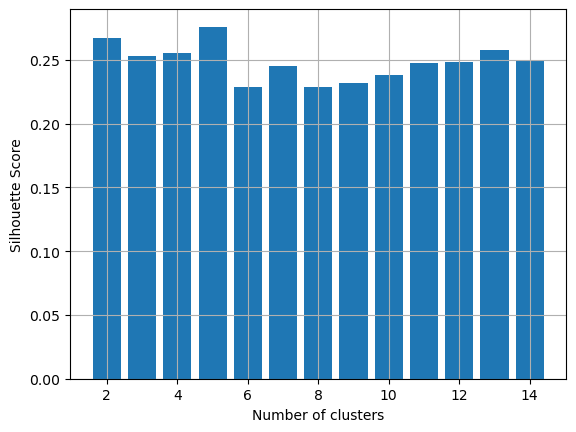

In [67]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

In [68]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5)
cluster = hc.fit_predict(df)


In [69]:
silhouette_score(df, AgglomerativeClustering(n_clusters = 5).fit_predict(df))

0.2760116372493081

In [70]:
df["label"] = cluster

In [71]:
df[df['label']==0].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.0
mean,1.863946,2.639456,-0.346626,0.508589,0.661804,-0.317064,0.685809,0.104940,0.0
std,0.344018,0.701716,0.541931,0.791987,0.839329,0.311939,0.925086,0.576289,0.0
min,1.000000,1.000000,-0.948496,-0.633787,-0.664774,-0.628343,-0.600847,-0.540264,0.0
25%,2.000000,3.000000,-0.773517,-0.022961,0.096733,-0.533275,0.098271,-0.335962,0.0
50%,2.000000,3.000000,-0.510593,0.277908,0.439272,-0.408098,0.470244,-0.035099,0.0
75%,2.000000,3.000000,-0.008929,0.794865,1.140994,-0.197649,0.995921,0.378476,0.0
max,2.000000,3.000000,1.560499,3.268554,3.990233,1.460681,4.482899,2.243293,0.0


In [72]:
df[df['label']==1].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0
mean,1.071429,2.50000,3.243818,0.415979,0.189477,1.954994,-0.235667,1.392636,1.0
std,0.267261,0.85485,1.816014,1.492367,0.716076,3.035573,0.321531,2.012136,0.0
min,1.000000,1.00000,0.497960,-0.710971,-0.742627,-0.012359,-0.560531,-0.459679,1.0
25%,1.000000,2.25000,2.521854,-0.314097,-0.329557,0.505308,-0.439060,0.032440,1.0
50%,1.000000,3.00000,3.097749,-0.177600,-0.023680,0.788399,-0.362208,0.419656,1.0
75%,1.000000,3.00000,3.494014,0.092035,0.571035,2.440028,-0.275960,2.232909,1.0
max,2.000000,3.00000,7.927738,4.154476,1.482005,11.919002,0.433918,5.324340,1.0


In [73]:
df[df['label']==2].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.0
mean,1.032967,2.487179,-0.006630,-0.407719,-0.474053,0.046840,-0.459355,-0.195982,2.0
std,0.178878,0.809423,0.800434,0.330613,0.286898,0.830980,0.188647,0.301117,0.0
min,1.000000,1.000000,-0.949683,-0.778795,-0.837334,-0.623806,-0.604416,-0.540264,2.0
25%,1.000000,2.000000,-0.671205,-0.636228,-0.662351,-0.467284,-0.568510,-0.408914,2.0
50%,1.000000,3.000000,-0.221429,-0.517536,-0.569224,-0.262094,-0.530295,-0.277564,2.0
75%,1.000000,3.000000,0.456719,-0.286662,-0.341462,0.258203,-0.434755,-0.058529,2.0
max,2.000000,3.000000,2.460843,1.477314,0.949682,6.586112,0.394863,1.540392,2.0


In [74]:
df[df['label']==3].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,1.0,1.0,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.0
mean,1.0,3.0,1.966817,5.175503,1.287217,6.9006,-0.554862,16.478447,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,3.0,1.966817,5.175503,1.287217,6.9006,-0.554862,16.478447,3.0
25%,1.0,3.0,1.966817,5.175503,1.287217,6.9006,-0.554862,16.478447,3.0
50%,1.0,3.0,1.966817,5.175503,1.287217,6.9006,-0.554862,16.478447,3.0
75%,1.0,3.0,1.966817,5.175503,1.287217,6.9006,-0.554862,16.478447,3.0
max,1.0,3.0,1.966817,5.175503,1.287217,6.9006,-0.554862,16.478447,3.0


In [75]:
df[df['label']==4].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,2.0,2.800000,1.076764,5.109117,5.638317,-0.089899,5.688837,0.420295,4.0
std,0.0,0.447214,1.154024,3.413539,2.304664,0.639366,1.896569,0.796485,0.0
min,2.0,2.000000,-0.271932,-0.110725,2.545492,-0.606484,3.609186,-0.220764,4.0
25%,2.0,3.000000,0.325870,4.418448,5.016638,-0.429958,4.470300,-0.110004,4.0
50%,2.0,3.000000,0.864778,5.480306,5.440874,-0.421915,5.001541,0.174706,4.0
75%,2.0,3.000000,1.895179,6.573905,6.252053,0.037546,7.395486,0.503791,4.0
max,2.0,3.000000,2.569923,9.183650,8.936528,0.971318,7.967672,1.753747,4.0


# Interpretation of clusters (Agglomerative Clustering)

# Cluster Sizes:
Cluster 1: 147 data points
Cluster 2: 14 data points
Cluster 3: 273 data points
Cluster 4: 1 data point (essentially an outlier)
Cluster 5: 5 data points
# Key Observations:
# Cluster 1:

Channel & Region:
Majority are from Channel 2 and Region 3.

Features:
Mean values for features like Fresh, Milk, and Grocery are close to zero, indicating average consumption.
Frozen and Delicassen have negative mean values, suggesting below-average values for these features.
Detergents_Paper has a slightly positive mean, indicating some specialization in this feature.

Variability:
Standard deviations are moderate, showing a fair amount of variability within the cluster.
# Cluster 2:

Channel & Region:
Most data points are from Channel 1, and Region 2 and 3.

Features:
High mean value for Fresh indicates heavy usage.
Moderate positive values for Frozen, and very high standard deviation for Detergents_Paper.
Delicassen has a high mean, indicating specialization in this feature.

Variability:
High variability, particularly in Fresh, Milk, Frozen, and Delicassen, suggesting that this cluster represents a highly diverse set of data points.
# Cluster 3:
Channel & Region:
Majority are from Channel 1 and Region 2 or 3.

Features:
Fresh, Milk, Grocery, Frozen, and Detergents_Paper have slightly negative or close-to-zero mean values, indicating lower than average consumption.
Delicassen also shows a slight negative mean, pointing towards below-average values.

Variability:
Lower variability compared to Cluster 2, especially in features like Milk, Grocery, and Delicassen, suggesting that this cluster represents a more homogeneous group.

# Cluster 4:
Single Data Point:
This cluster represents an outlier with extremely high values in Milk, Frozen, and Delicassen.
This data point is unique and not representative of any larger group, making it stand out as an anomaly.
# Cluster 5:
Channel & Region:
All data points are from Channel 2 and Region 3.

Features:
High mean values for Milk, Grocery, and Detergents_Paper, suggesting specialization in these features.
Fresh has a slightly positive mean, indicating moderate consumption.
Frozen and Delicassen are slightly below zero, showing less focus on these features.

Variability:
High variability in Milk and Grocery, but lower in other features, indicating that this cluster is characterized by its focus on specific product types.
# Overall Comparisons:
Cluster 1 and Cluster 3 are somewhat similar in terms of feature distribution, with both clusters having mean values close to zero, but Cluster 1 shows slightly higher values in features like Milk, Grocery, and Delicassen. Cluster 3 is more homogeneous, whereas Cluster 1 has more variation.

Cluster 2 stands out with significantly higher values for Fresh, Milk, and Delicassen, indicating that this cluster likely contains a group of high-volume consumers or businesses with diverse purchasing patterns.

Cluster 4 is an outlier with exceptionally high values, especially in Milk, Frozen, and Delicassen. This data point likely represents a special case or an anomaly in the data.

Cluster 5 is characterized by its focus on Milk, Grocery, and Detergents_Paper, with high mean values in these features. This cluster has higher variability, suggesting that it represents a more specialized group of consumers or businesses.

# Conclusion:
Clusters 1 and 3 represent more average consumers with moderate consumption levels, though Cluster 1 is slightly more varied.
Cluster 2 indicates high-volume and diverse consumption, potentially representing a more varied or large-scale operation.
Cluster 4 is an outlier, with unique and extreme values in several features.
Cluster 5 focuses on specific product categories with high variability, likely representing specialized consumers or businesses.

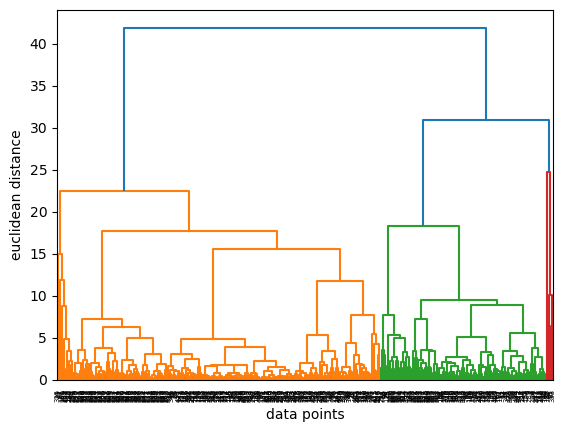

In [76]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

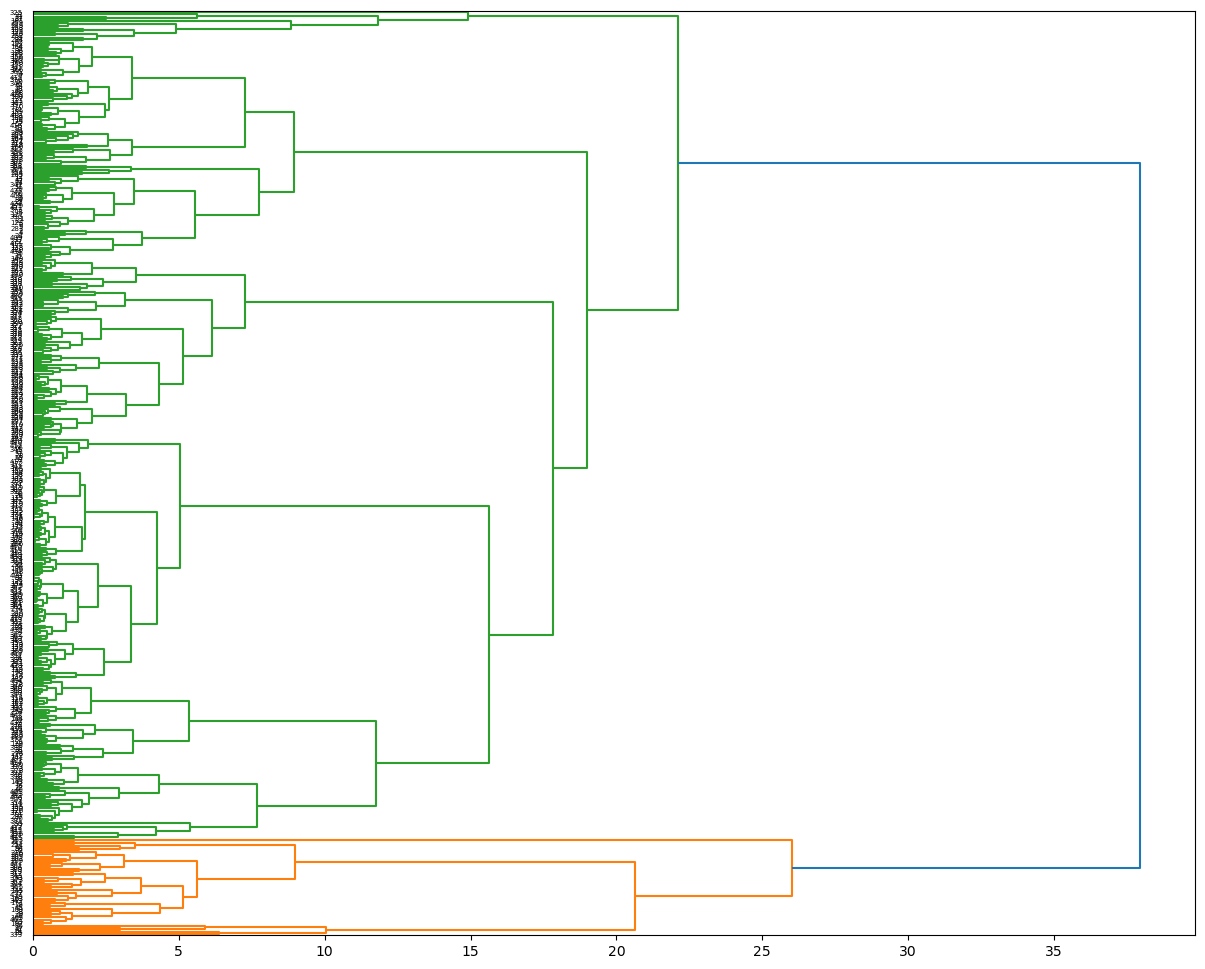

In [77]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(df1, 'ward')

#labelList = ["foo" for i in range(0, 20)]

plt.figure(figsize=(15, 12))
dendrogram(
            linked,
            orientation='right',
            #labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.show()
